## Ayudantía I2 : Salvando la segunda interrogación


#### Nota:
- Primero hay código de práctica
- Luego hay contenido en forma de notas, puede que falten cosas para que complementen con sus propios apuntes.
- Si tienen dudas me pueden preguntar por cualquier medio
- Ánimo! Suerte en su evaluación :D

Ayudantía: Fran Yepsen

Fecha : 13 Nov 2025

In [ ]:
#instalaciones solo si usan ambientes
%pip install numpy pandas

In [ ]:
%pip install scikit-learn matplotlib seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score as pr, recall_score as recall
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


### 1.Lectura de los datos :
- Recuerden siempre en qué directorio tienen la base de datos y qué tipo de data set es.

#### Observación:
- Comunmente el dataset llega completo sin estar separado en X e Y (variable objetivo)
- La limpieza de datos se hace sobre data_bc para no generar problemas con las dimensiones, sin embargo la estandarización se hace con los datos separados para evitar data leakage.
- Recuerden siempre comentar su código y cuidado con hacer todas las transformaciones sobre la variable original en que cargaron el DT, vayan haciendo copias para que si se equivocan o borran columnas puedan volver a un punto medio de avance.
- Ojo con siempre responder las preguntas de información y descripción del dataset

In [2]:
data_bc = pd.read_csv('Student_Performance.csv')
data_bc.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
data_bc.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

#### 1.1 Descripción del dataset
- Columnas(variables) : 6
- Filas(entradas) : 10.000
- No hay datos nulos




##### 1.1.2 Valores nulos
- Se revisa en cada columna cuantos valores nulos hay.
- Recuerden que es diferente botar una columna con nulos a las filas que tienen nulos

In [ ]:
#Sabemos que no hay nulos pero revisemos nuevamente
#Suma de datos nulos por columna
null_sum = data_bc.isna().sum()
null_sum

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Posible caso 1 : "Elimine las columnas que tengan x% de datos faltantes"

Posible caso 2 :  Revise las filas y elimne las muestras que tengan algún dato nulo entre sus columnas

Posible caso 3 : Rellene las entradas nulas de X columna con (0, media, *, etc)

In [ ]:
#Aquí se puede obtener el porcentaje de valores nulos por columna
total = null_sum.sort_values(ascending=False)
percent = ( ((null_sum / len(data_bc.index))*100).round(2) ).sort_values(ascending=False)
df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
df_NA.head()

#referencia : https://medium.com/data-science/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf

,Number of NA,Percent NA
Hours Studied,0,0.0
Previous Scores,0,0.0
Extracurricular Activities,0,0.0
Sleep Hours,0,0.0
Sample Question Papers Practiced,0,0.0


In [ ]:
#Limpieza de datos, copiamos el data set original
data_clean = data_bc.copy()
# data_clean = data_clean.drop(columns=[....]) #si se quiere eliminar alguna columna en específico
data_clean = data_clean.dropna() #ahora si, porque si se bota nan y después la colummna como tiene 100% nan el dataset queda vacio

In [ ]:
#Si le pidieran imputar los datos nulos estas son algunas opciones:
data_clean['Previous Scores'] = data_clean['Previous Scores'].fillna( data_clean['Previous Scores'].mean() ) #imputar con la media
data_clean['Previous Scores'] = data_clean['Previous Scores'].fillna(0) #imputar con 0

##### 1.1.3 Valores duplicados
- Para ver datos duplicados, depende del contexto pero si se los exigen aquí hay algunos casos posibles.

Caso 1: Identifique y luego eliminar los datos que estés duplicados.

In [ ]:
duplicates = data_clean[ data_clean.duplicated() ]
duplicates.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0


In [ ]:
data_clean = data_clean.drop_duplicates() #eliminar duplicados

#### 1.2 EDA

- Podrían pedir filtrar para trabajar solo con una fracción de los datos

Caso 1: Trabaje solo con las siguientes columnas 'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean'.
Caso 2 : Trabaje solo con las filas que tengan en la columna 'radius_mean' valores mayores a 10

In [ ]:
df_short = data_clean[['Sleep Hours', 'Hours Studied', 'Previous Scores']]
df_rdmean = data_clean[ data_clean['Sleep Hours'] < 5]
df_short.head(5)

,Sleep Hours,Hours Studied,Previous Scores
0,9,7,99
1,4,4,82
2,7,8,51
3,5,5,52
4,8,7,75


#### 1.2.1 Distribución (univariada y bivariada) de algunas variables

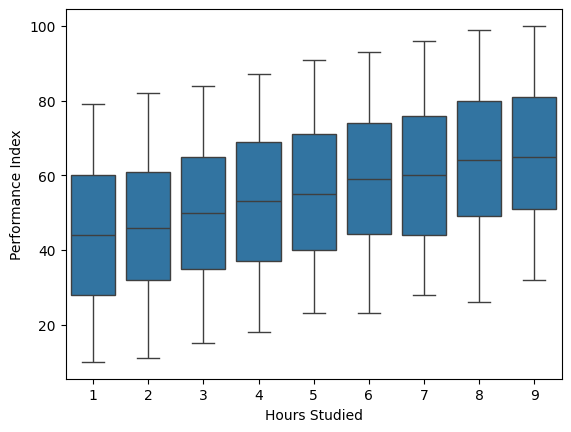

In [ ]:
paleta = {"M": "#b6042a", "B": "#87ceeb"}
sns.boxplot(
    y='Performance Index',
    x='Hours Studied',
    data=data_clean
)
plt.show()

#Analisis grafico bivariado de continua vs categorica
# box plot : muestra mediana, minimos, maximos y cuartiles
# Valores fuera de los bigotes son outliers
# El tamaño de los bigotes representa la dispersión de los datos y que tan cerca estan los valores de minimo y maximo a los cuartiles

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

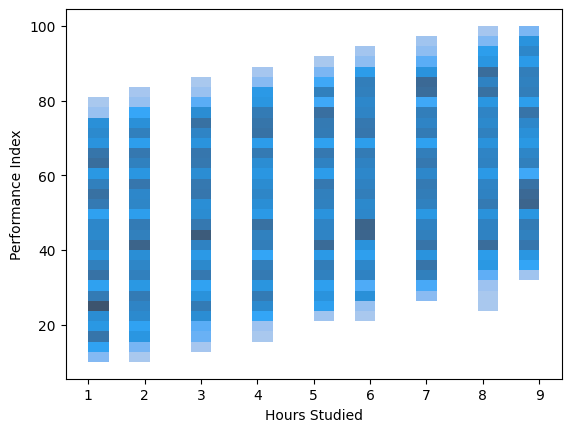

In [ ]:
sns.histplot(x="Hours Studied", y = "Performance Index", data = data_clean)

In [ ]:
data_clean['Hours Studied'].value_counts()

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64

Text(0, 0.5, 'Performance Index')

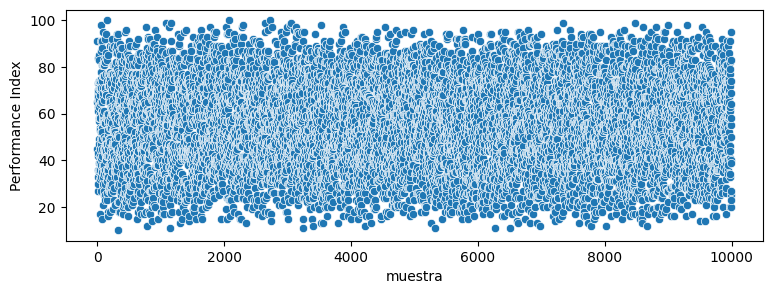

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,3))
ax = sns.scatterplot(data_clean['Performance Index'])
plt.xlabel('muestra')
plt.ylabel('Performance Index')

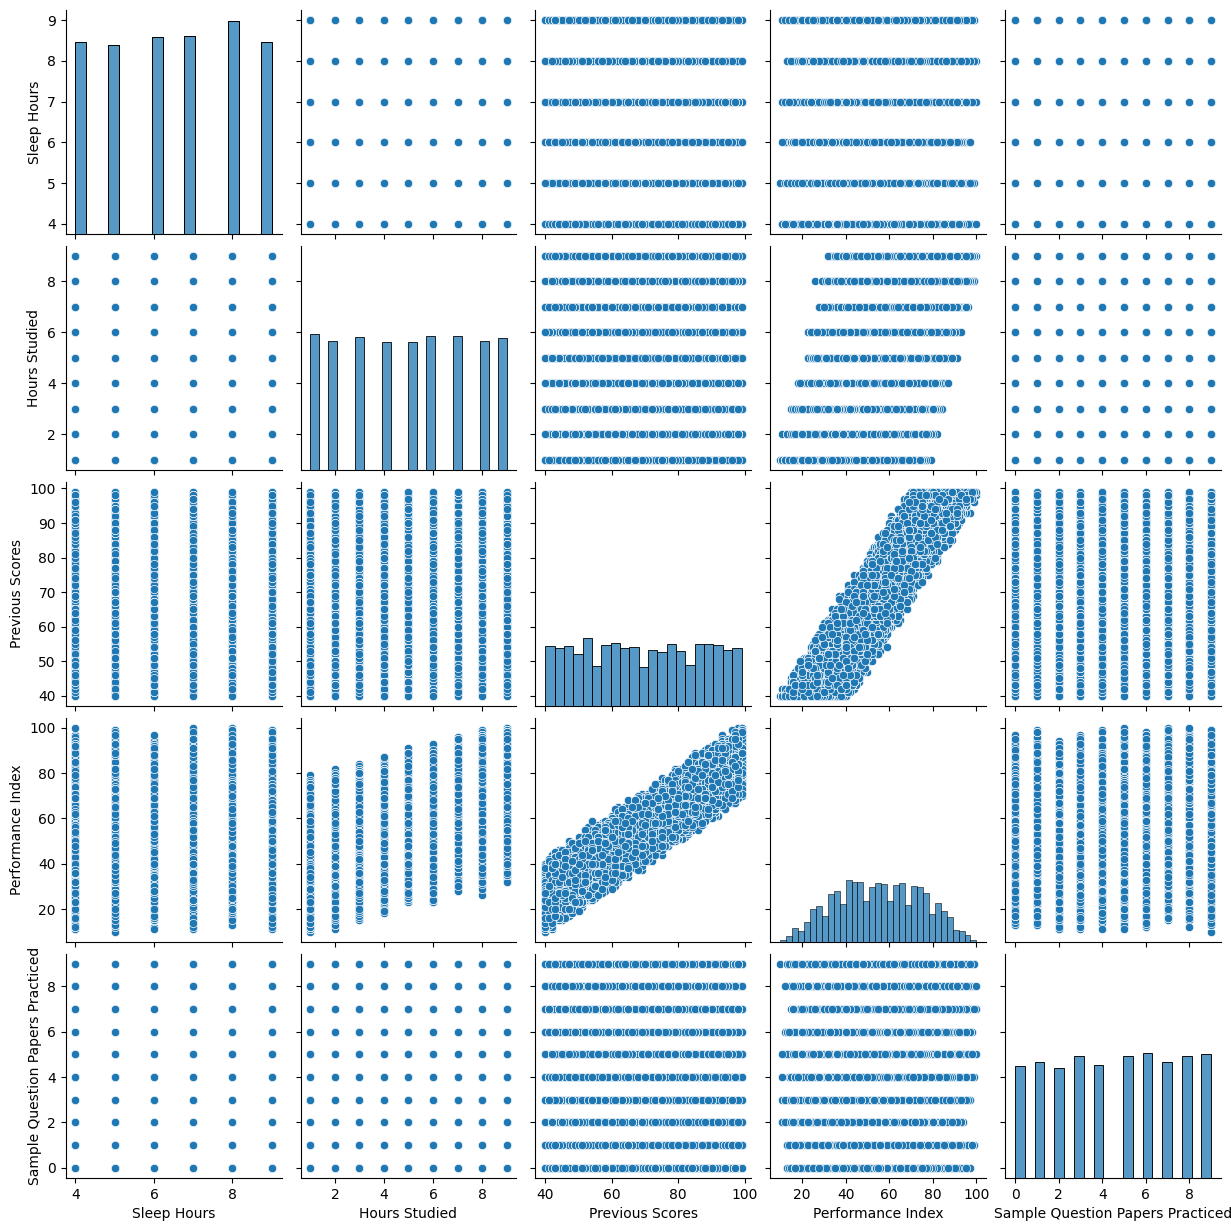

In [ ]:
#Analisis bivariado de los promedios
cols = ['Sleep Hours', 'Hours Studied', 'Previous Scores', 'Performance Index', 'Sample Question Papers Practiced']

sns.pairplot(data=data_clean[cols])

1.2.2 Correlación de variables numéricas
OJO : **CORRELACIÓN NO IMPLICA CAUSALIDAD**

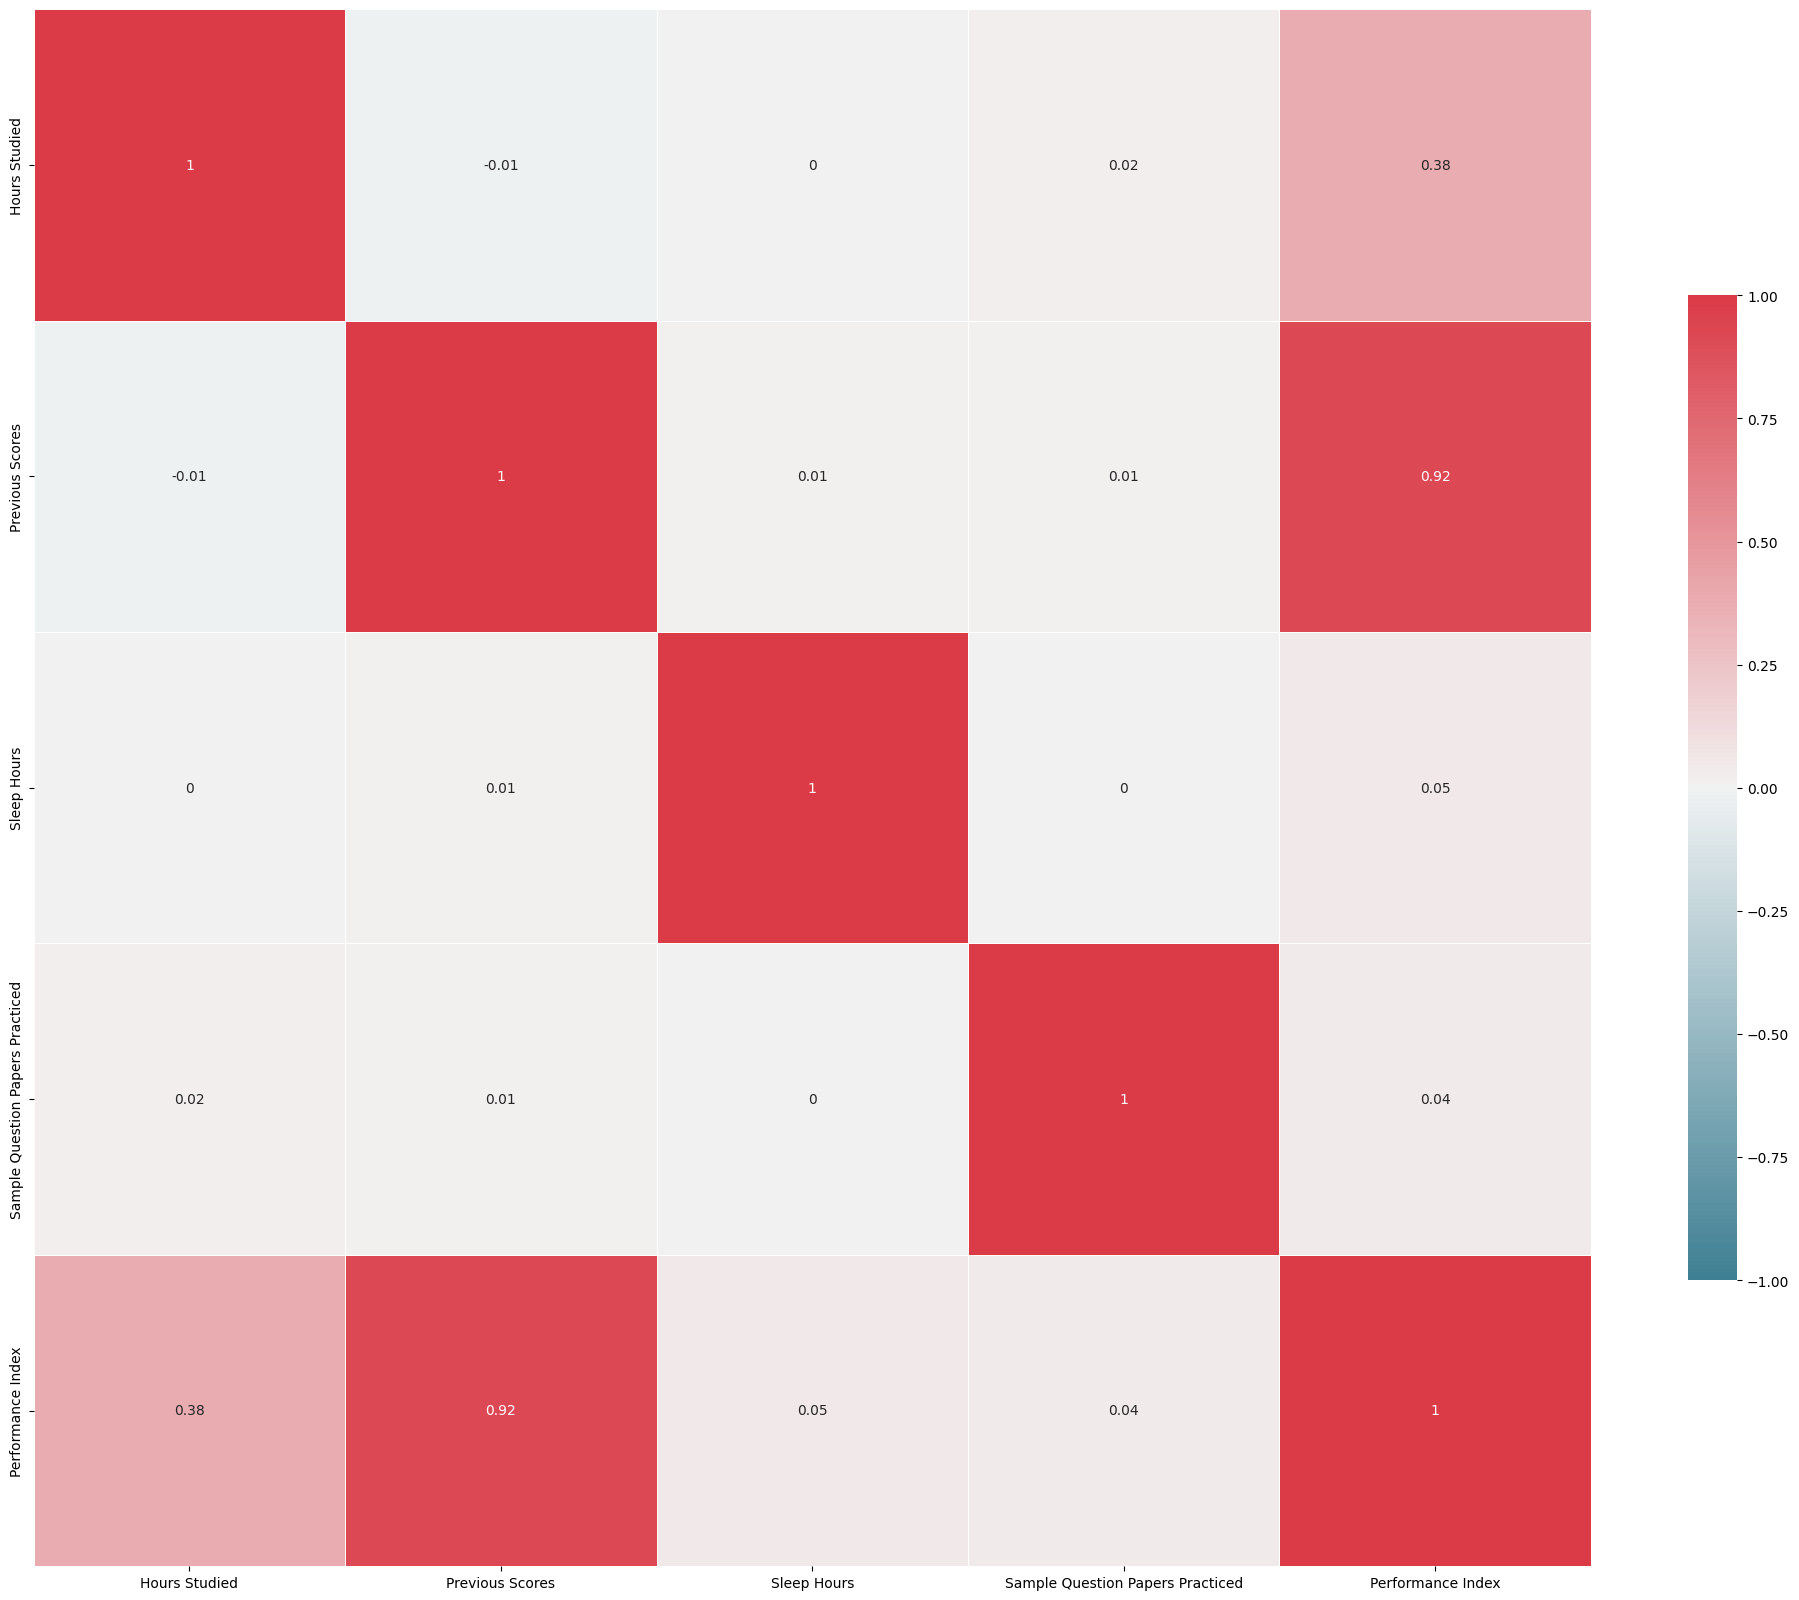

In [ ]:
columnas_numericas = data_clean.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_clean[columnas_numericas].corr().round(2)
f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation_matrix, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

#### 2. Regresiones



##### Regresiones :

1. Regresión lineal
2. Regresión polinomial
3. Regresión lineal múltiple

¿Cuándo se elige cada una?
¿Qué tipo regresión se usa para distintos tipos de datos u objetivos?
##### Métricas :
- R^2 : Entrega la proporción de varianza que tiene la variable dependiente respecto de las variables independientes. (Cuán bien se ajusta el modelo a los datos)(1 es perfecto)
- MSE : El promedio de la suma de los errores al cuadrado. (Magnitud de los errores de predicción del modelo) (El 0 es perfecto)

##### Análisis :

- Overfitting (mse (train) vs r^2 (test))
- Underfitting
- multicolinealidad (correlación predictores)
-

2.1 Preparando los datos  


In [ ]:
y = data_clean['Performance Index']
X = data_clean['Previous Scores'].values.reshape(-1, 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (Slope): 1.0143332759575587
Intercept: -15.243751018795592


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 6.67813232027054
Mean Squared Error (MSE): 60.47888307516191
R-squared Score: 0.8363020258325226


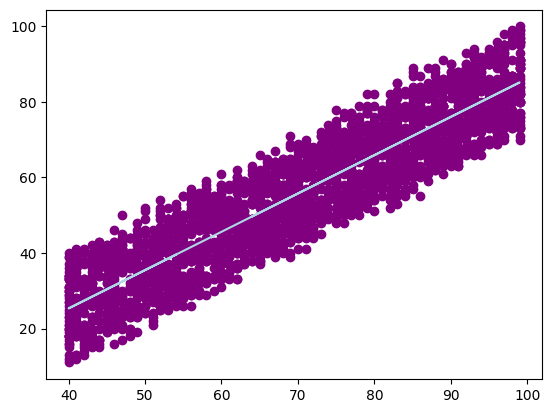

In [ ]:
plt.scatter(X_test, y_test, color ='purple')
plt.plot(X_test, y_pred, color ='lightblue')

plt.show()

#### 2.2 Regresión multilineal
-> predecir sobre varias variables (predictores), se mantiene el supuesto de relación lineal
-> Ojo: multicolinealidad

In [ ]:
X_m = data_clean[['Previous Scores', 'Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced']]  # indp
y_m = data_clean['Performance Index']  # dep
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.25, random_state=42)
model_m = LinearRegression()
model_m.fit(X_m_train, y_m_train)
y_m_pred = model_m.predict(X_m_test)

mae_m = mean_absolute_error(y_m_test, y_m_pred)
mse_m = mean_squared_error(y_m_test, y_m_pred)
r2_m = r2_score(y_m_test, y_m_pred)
print("Mean Absolute Error (MAE):", mae_m)
print("Mean Squared Error (MSE):", mse_m)
print("R-squared Score:", r2_m)



Mean Absolute Error (MAE): 1.6738760130606294
Mean Squared Error (MSE): 4.445195874125203
R-squared Score: 0.9879682043984246


#### 2.3 Regresión Polinomial

-> Para relaciones más complejas no lineales

In [ ]:
y = data_clean['Performance Index']
X = data_clean['Previous Scores'].values.reshape(-1, 1)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X, y, test_size=0.25, random_state=42)

Intercepto (beta_0): -15.243751018795606
Coeficientes (beta_1, beta_2): [0.         1.01433328]
Grado 1:
  Mean Absolute Error (MAE): 6.67813232027054
  Mean Squared Error (MSE): 60.47888307516191
  R-squared Score: 0.8363020258325226


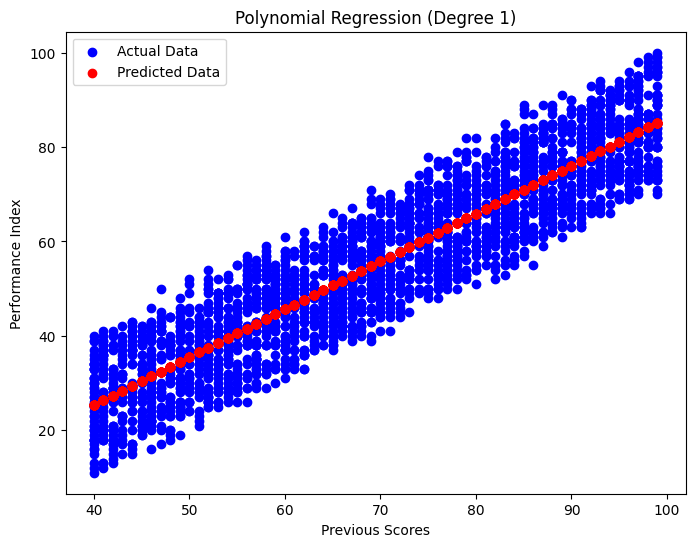

Intercepto (beta_0): -15.759083501596052
Coeficientes (beta_1, beta_2): [ 0.00000000e+00  1.03016106e+00 -1.13965417e-04]
Grado 2:
  Mean Absolute Error (MAE): 6.67770506296908
  Mean Squared Error (MSE): 60.48714217889925
  R-squared Score: 0.8362796709462962


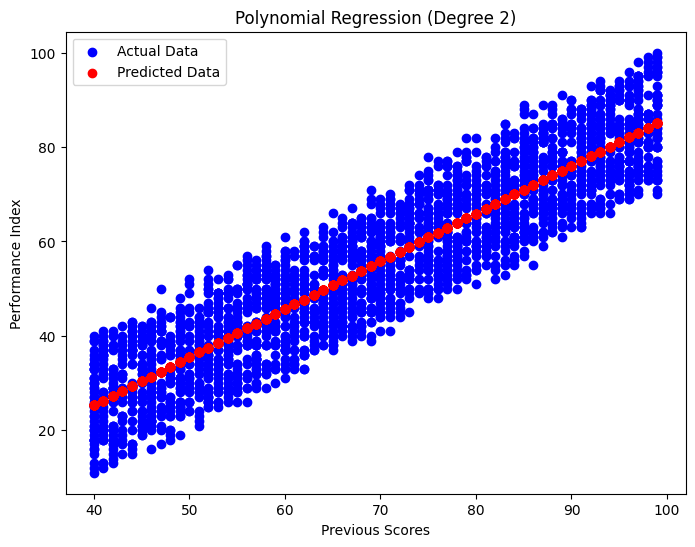

Intercepto (beta_0): -17.01717932934679
Coeficientes (beta_1, beta_2): [ 0.00000000e+00  1.08910766e+00 -9.96620090e-04  4.24238093e-06]
Grado 3:
  Mean Absolute Error (MAE): 6.678058566596109
  Mean Squared Error (MSE): 60.49266613942289
  R-squared Score: 0.8362647192623179


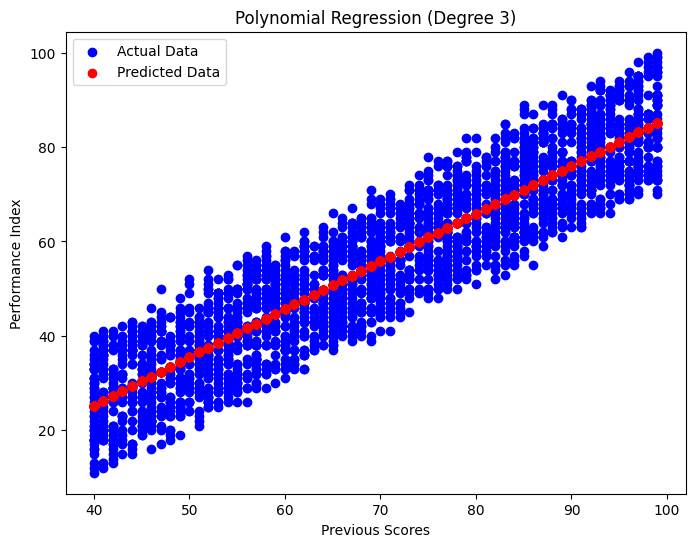

Intercepto (beta_0): -96.565030348221
Coeficientes (beta_1, beta_2): [ 0.00000000e+00  6.52730835e+00 -1.42444971e-01  1.74470229e-03
 -1.00358928e-05  2.12835713e-08]
Grado 5:
  Mean Absolute Error (MAE): 6.680810935614083
  Mean Squared Error (MSE): 60.55636531544004
  R-squared Score: 0.8360923049328868


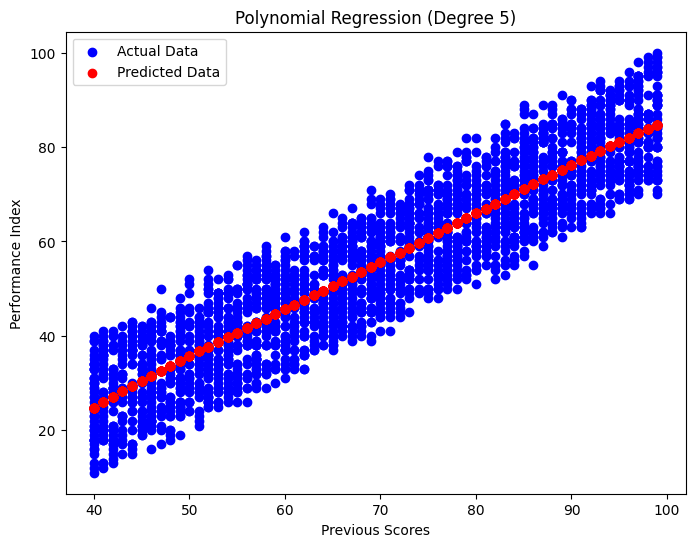

Intercepto (beta_0): 5.249759784123569
Coeficientes (beta_1, beta_2): [ 0.00000000e+00  1.27077868e-09  7.05301455e-08  2.34244546e-06
  4.21395806e-05 -1.57383257e-06  2.36958994e-08 -1.65049191e-10
  4.41170835e-13]
Grado 8:
  Mean Absolute Error (MAE): 6.679648597905413
  Mean Squared Error (MSE): 60.532329169509104
  R-squared Score: 0.8361573634821791


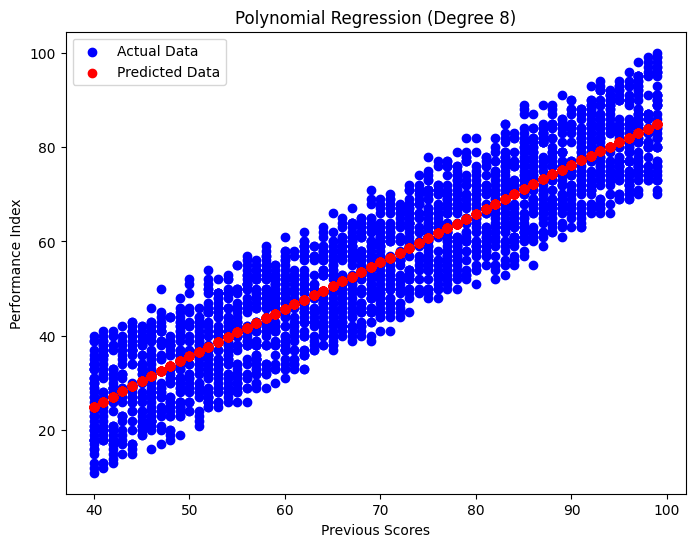

Intercepto (beta_0): 16.104342191583044
Coeficientes (beta_1, beta_2): [ 0.00000000e+00  6.18238492e-15  1.77097914e-14  9.00039777e-13
  3.49457801e-11  1.00492600e-09  1.68887191e-08 -6.88408831e-10
  1.08452955e-11 -7.74507167e-14  2.10104422e-16]
Grado 10:
  Mean Absolute Error (MAE): 6.678591633888344
  Mean Squared Error (MSE): 60.49784060722612
  R-squared Score: 0.8362507135490224


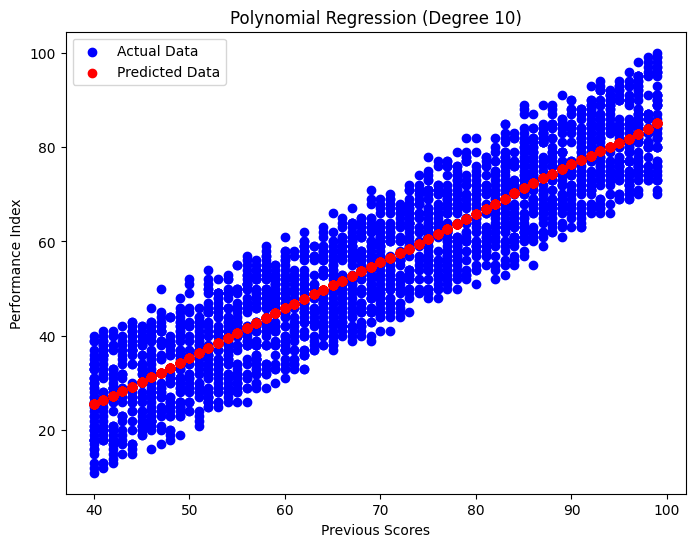

Intercepto (beta_0): 28.306841171918393
Coeficientes (beta_1, beta_2): [ 0.00000000e+00 -1.35117090e-21  4.94706424e-25  4.70455173e-24
  2.93612979e-22  1.64023823e-20  8.18005390e-19  3.52565985e-17
  1.20839947e-15  2.58217143e-14 -8.00048219e-16  8.34954278e-18
 -2.92733628e-20]
Grado 12:
  Mean Absolute Error (MAE): 6.742181763981198
  Mean Squared Error (MSE): 62.1589170523474
  R-squared Score: 0.831754683940378


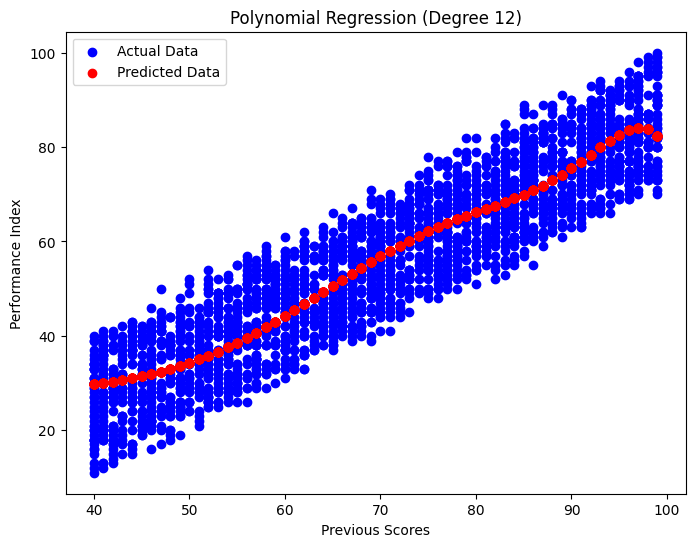

In [ ]:
lista_grados = [1,2,3,5,8,10,12]
for grados in lista_grados:
    #transformación polinomial :D
    poly =  PolynomialFeatures(degree=grados)
    X_poly_train = poly.fit_transform(X_p_train)
    X_poly_test = poly.transform(X_p_test)

    #Entremos modelo con data transformada
    model_p = LinearRegression()
    model_p.fit(X_poly_train, y_p_train)

    #predicciones
    y_p_pred = model_p.predict(X_poly_test)



    #METRICAS

    mae_p = mean_absolute_error(y_p_test, y_p_pred)
    mse_p = mean_squared_error(y_p_test, y_p_pred)
    r2_p = r2_score(y_p_test, y_p_pred)

    #PRINTS
    print("Intercepto (beta_0):", model_p.intercept_)
    print("Coeficientes (beta_1, beta_2):", model_p.coef_)
    print(f"Grado {grados}:")
    print("  Mean Absolute Error (MAE):", mae_p)
    print("  Mean Squared Error (MSE):", mse_p)
    print("  R-squared Score:", r2_p)

    #GRÁFICO
    plt.figure(figsize=(8, 6))
    #Datos reales
    plt.scatter(X_p_test, y_p_test, color='blue', label='Actual Data')
    #Datos predichos
    plt.scatter(X_p_test, y_p_pred, color='red', label='Predicted Data')
    plt.title(f'Polynomial Regression (Degree {grados})')
    plt.xlabel('Previous Scores')
    plt.ylabel('Performance Index')
    plt.legend()
    plt.show()

### 3. KNN
- Utilizable para tareas de clasificación y regresión
- El hiperparámetro más relevante a seleccionar es el k. Que representa la cantidad de vecinos a considerar para hacer el modelo.


#### DATASET 2 : IRIS CSV
- Utilizaremos este dataset para el knn de clasificación.

In [ ]:
#knn regresión
data_iris = pd.read_csv('Iris.csv')
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

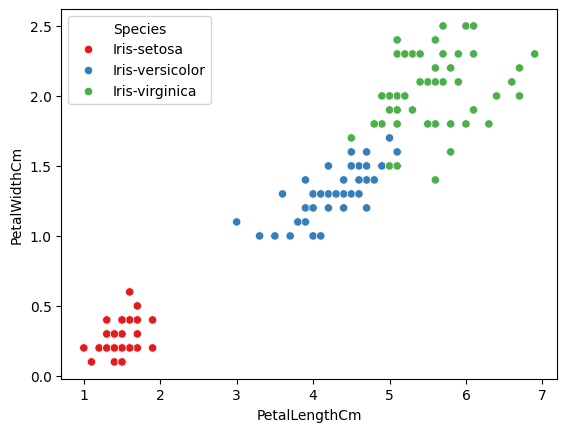

In [ ]:
sns.scatterplot(data=data_iris,x="PetalLengthCm", y="PetalWidthCm", hue="Species", palette="Set1")

In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'] #variables independientes (ignoramos ID)
X = data_iris[feature_columns].values
y = data_iris['Species'].values # .values lo deja en tipo array

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)  #convertir etiquetas de texto (especies) a números

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Como KNN es sensible a la escala de las variables, hay que estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
#Aquí se elige arbitrariamente k=30 pueden probar idealmente con varios k y ver cual es mejor
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)


In [ ]:
cm = confusion_matrix(y_test, y_pred)  #Matriz de confusión, entrega Falsos positivos y negativos / verdaderos positivos y negativos
cm

array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  3, 10]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888



# Apuntes de Machine Learning

## 1. Conceptos Generales

### Definiciones Básicas
* **Algoritmo:** Método o conjunto de pasos para lograr una tarea.
* **Aprendizaje:** Proceso de convertir experiencia en habilidad, conocimiento, programa o modelo que realice una tarea.
* **Algoritmos de Aprendizaje de Máquina (ML):** Métodos computacionales que usan datos para generar modelos o programas capaces de realizar tareas (predecir, clasificar, agrupar, ordenar).

### Evaluación y Elección de Algoritmos

* **¿De qué depende la elección del algoritmo? **
    * **Contexto
    * **Complejidad del problema
    * **Suposiciones
    * **Tamaño y **Variedad de la data

---

## 2. Tipos de Aprendizaje

| Característica | Aprendizaje Supervisado | Aprendizaje No Supervisado | Aprendizaje Semi-supervisado | Aprendizaje Reforzado |
| :--- | :--- | :--- | :--- | :--- |
| **Objetivo** | Predicciones precisas para nuevos datos. Generalización de los datos. | Descubrir patrones nuevos y relaciones. | Mejorar la precisión de aprendizaje usando ambos tipos de datos. | Maximizar una recompensa a través de acciones. |
| **Input/Datos** | Datos etiquetados (pares input/output conocidos). | Datos de entrada no etiquetados (no se conocen outputs previos). | Utiliza datos etiquetados y no etiquetados. | Entorno interactivo (feedback). |


## 3. Conceptos Teóricos del Aprendizaje Supervisado

### División de Datos
El objetivo es generar predicciones precisas para nuevos datos (generalización).
1.  **Datos de entrenamiento (Train):** Para entrenar el modelo.
2.  **Datos de testeo (Test):** Para verificar qué tan bien funciona con datos desconocidos. **No** se usan en el entrenamiento.
3.  **Etiquetas ($y$):** Valores o categorías asignadas a los datos (lo que se intenta predecir).
4.  **Hiperparámetros:** Parámetros de configuración externa; no se aprenden del conjunto de entrenamiento (controlan estructura y rendimiento).
5.  **Función de pérdida:** Mide qué tan bien funciona la predicción (ej. MSE).

### Ajuste del Modelo (Bias vs. Variance)

| Estado | Error de Entrenamiento | Error de Prueba | Causa/Solución |
| :--- | :--- | :--- | :--- |
| **Underfitting** | Alto | Alto (similar al de entrenamiento) | Modelo muy simple. Solución: Agregar *features*, usar modelo más complejo. |
| **Óptimo** | Bajo | Levemente más bajo/similar | Buen equilibrio. |
| **Overfitting** | Bajo (Muy bajo) | Alto (Mayor al de entrenamiento) | Modelo memoriza los datos (alta varianza). Sensible a ruido/outliers. Solución: Simplificar, regularización, más datos. |

> **Notas:**
> * A mayor cantidad de datos, se permite más complejidad sin caer en overfitting.
> * **Ruido:** Error irreductible por causas desconocidas.
> * **Varianza baja:** Regresión logística.
> * **Varianza alta:** KNN, Árboles de decisión, SVM (muy influenciados por detalles del train).

---

## 4. Modelos de Machine Learning

### A. Modelos de Regresión (Variable Dependiente Continua)

**Objetivo:** Determinar la relación entre variables independientes ($X$) y una dependiente ($y$).

#### 1. Regresión Lineal
* **Fórmula:** $y_t = \alpha + \beta x_t + \epsilon_t$
    * $y$: Variable dependiente.
    * $x$: Variable independiente/predictora.
    * $\epsilon$: Error ($y - \hat{y}$).
    * $\beta_0$: Intercepto.
    * $\beta_1$: Pendiente.
* **Tipos:**
    * *Simple:* Una variable independiente.
    * *Múltiple:* Múltiples variables independientes.
* **Evaluación:**
    * **MSE (Mean Squared Error):** Se busca minimizar.
    * **$R^2$ (Coeficiente de determinación):** 1 es ajuste perfecto, 0 es malo.
    * **RMSE:** Raíz del error cuadrático medio.
* **Sensibilidad:** Puede ser sensible a ruido y outliers (por el MSE). Puede tener bajo rendimiento en alta dimensionalidad.

#### 2. Regresión Polinomial
* Modela la relación entre $x$ e $y$, pero $x$ está elevado a un número mayor a 1 (relación no lineal).

#### 3. Regresión Regularizada (Lasso vs. Ridge)
Técnicas para evitar el overfitting penalizando los coeficientes.

| Característica | Regresión Lasso (L1) | Regresión Ridge (L2) |
| :--- | :--- | :--- |
| **Penalización** | Suma del valor absoluto de los coeficientes. | Suma de los coeficientes al cuadrado. |
| **Efecto en coeficientes** | **Puede anular coeficientes** (llevarlos a cero). | Hace tender los coeficientes a cero, pero **no los anula**. |
| **Selección de variables** | Sí (puede dejar un modelo simplificado) regulariza y selecciona variables, útil en alta dimensión. | No reduce el número de variables. |
| **Colinealidad** | Si hay variables colineales, elige una aleatoriamente. | Reduce la influencia de variables colineales simultáneamente. |
| **Robustez** | Robusto a alta dimensionalidad (selección automática). | Menos sensible que la lineal simple. |

---

### B. Modelos de Clasificación (Variable Dependiente Categórica)

#### 1. Regresión Logística
* **Uso:** Variable dependiente binaria (0, 1) o multiclase.
* **Función:** Utiliza la función **sigmoide** para transformar la salida en probabilidad.
* **Características:** Asume linealidad. Baja varianza.

#### 2. K-Nearest Neighbors (KNN)
* **Tipo:** Puede usarse para **Regresión**  y **Clasificación**
* **Funcionamiento:** Usa las observaciones más similares (cercanas) al input $x$.
* **Pros:** Intuitivo, no asume linealidad.
* **Contras:**
    * Sensible a ruido y outliers.
    * Sensible a alta dimensionalidad (maldición de la dimensionalidad).
    * **Requiere normalización:** Escalar datos para que las distancias sean equiparables.
    * Caja negra (menos interpretable que un árbol).

#### 3. Árboles de Decisión
* **Tipo:** Clasificación y Regresión.
* **Estructura:**
    * *Root node:* Muestra total.
    * *Splitting:* Separación homogénea.
    * *Decision node:* Separación en sub-nodos.
    * *Leaf node:* Nodo final (no se separa más).
    * *Pruning:* Podar ramas para prevenir overfitting.
* **Pros:**
    * Alta interpretabilidad (visual).
    * No asume linealidad.
    * Acepta datos categóricos y numéricos.
    * Selecciona *features* importantes automáticamente.
    * Robusto a ruido y outliers.
* **Contras:** Puede crear modelos muy complejos (**Overfitting**).

#### 4. Máquinas de Soporte Vectorial (SVM) - Clasificador
* **Objetivo:** Buscar una función (hiperplano) que separe los datos en clases maximizando el margen.
* **Vectores de soporte:** Puntos que delimitan el trazo de la recta/plano.
* **Separación no lineal:** Si el margen flexible no sirve, se extiende el espacio a dimensiones adicionales ($p$) para encontrar una frontera (Kernel trick).

---

## 5. Evaluación y Selección de Modelos

### Métricas de Evaluación
* **Regresión:** MSE, RMSE, $R^2$.
* **Clasificación (Matriz de Confusión):**
    * **Exactitud (Accuracy):** Hacerlo bien en todas las clases.
    * **Precisión:** Capacidad de no calificar un negativo como positivo.
    * **Sensibilidad (Recall):** Capacidad de identificar todos los positivos reales.
    * **Especificidad:** Proporción de negativos identificados correctamente.

### Selección y Optimización
El objetivo es seleccionar el modelo con mayor capacidad de generalización.

1.  **Grid Search:**
    * Optimización de hiperparámetros.
    * Prueba combinaciones para encontrar la mejor configuración.
2.  **Cross Validation (Validación Cruzada):**
    * Evalúa la generalización de forma estable.
    * No mezcla datos de test y training durante la validación interna.
    * Calcula una precisión promedio.
    * *Nota:* Se suele aplicar a cada combinación de hiperparámetros del Grid Search.